<a href="https://colab.research.google.com/github/SciEcon/Active_Learning/blob/main/The_Right_Tool_for_the_Job_Matching_Active_Learning_Techniques_to_Learning_Objectives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note: This Colab is supplementary material for the paper by the following authors (names by alphabetic order)**

Sarah Jacobson, Luyao Zhang*, and Jiasheng Zhu

*names by alphabetic order, * corresponding author*




# Install and Import Packages

In [1]:
import pandas as pd 
import numpy as np

In [38]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [39]:
!pip install pingouin

In [40]:
!pip install scipy

In [41]:
import pingouin as pg

# Data Preparation



## import data

In [42]:
import io
df =  pd.read_csv("https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL1to7.csv")
df.head()

,Subject Number,Q1a. Reflection on the concept,Q1b. Game for individual decisions,Q1c. Presentation,Q1d. Peer evaluations,Q1e. Debate for Pro & Con,Q1f. Lecture,Q1g. Simulate economic cases using python,Q1h. Doing quizzes/exams,Q1i. Solving problem sets/homework,...,"Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - b. Game for individual decisions - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - c. Presentation - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - d. Peer evaluations - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - e. Debate for Pro & Con - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - f. Lecture - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - g. Simulate economic cases using python - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - h. Doing quizzes/exams - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - i. Solving problem sets/homework - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - j. Group discussion during class - Rank","Q10. Following Q9, can you give an example of how these learning activities have helped you?"
0,1,Somewhat inactively,Somewhat actively,Very actively,Somewhat actively,Very actively,Somewhat inactively,Very actively,Very actively,Very actively,...,10,1,4,9,8,2,7,5,6,The presentation helps me figure out the main ...
1,2,Somewhat inactively,Somewhat inactively,Neither inactively nor actively,Extremely inactively,Somewhat inactively,Neither inactively nor actively,Somewhat actively,Very inactively,Somewhat inactively,...,9,2,10,8,1,5,7,6,3,I learned to draw Lucicharts through class pre...
2,3,Very inactively,Extremely inactively,Somewhat inactively,Very inactively,Very inactively,Very inactively,Very inactively,Extremely inactively,Extremely inactively,...,1,6,4,10,7,5,9,3,2,It helps me design the signature research ques...
3,4,Somewhat actively,Very actively,Very actively,Very actively,Somewhat actively,Somewhat actively,Somewhat actively,Very actively,Very actively,...,7,2,10,3,4,1,9,8,5,Simulate economic cases using python helps me ...
4,5,Somewhat actively,Somewhat actively,Very actively,Extremely actively,Somewhat actively,Somewhat actively,Very actively,Very actively,Very actively,...,3,4,9,8,5,6,7,10,1,My peers have different opinions with me. We d...


## process data

In [43]:
'''
Replace responses with numerical numbers for data processing and economic and statistical analysis
'''

df_dummy = df.replace(to_replace =['Extremely actively','Very actively','Somewhat actively',
                             'Neither inactively nor actively','Somewhat inactively','Very inactively',
                            'Extremely inactively'],value =[3,2,1,0,-1,-2,-3])
df_dummy = df_dummy.replace(to_replace =['Extremely effective','Very effective','Somewhat effective',
                             'Neither ineffective nor effective','Somewhat ineffective','Very ineffective',
                             'Extremely ineffective'],value =[3,2,1,0,-1,-2,-3])
df_dummy.head()

,Subject Number,Q1a. Reflection on the concept,Q1b. Game for individual decisions,Q1c. Presentation,Q1d. Peer evaluations,Q1e. Debate for Pro & Con,Q1f. Lecture,Q1g. Simulate economic cases using python,Q1h. Doing quizzes/exams,Q1i. Solving problem sets/homework,...,"Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - b. Game for individual decisions - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - c. Presentation - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - d. Peer evaluations - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - e. Debate for Pro & Con - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - f. Lecture - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - g. Simulate economic cases using python - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - h. Doing quizzes/exams - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - i. Solving problem sets/homework - Rank","Q9. Which course activities did you find most useful in developing your Signature Work? Rank by ordering the items in the box below, with the most useful one at the top. - Ranks - Drag items here to Rank - j. Group discussion during class - Rank","Q10. Following Q9, can you give an example of how these learning activities have helped you?"
0,1,-1,1,2,1,2,-1,2,2,2,...,10,1,4,9,8,2,7,5,6,The presentation helps me figure out the main ...
1,2,-1,-1,0,-3,-1,0,1,-2,-1,...,9,2,10,8,1,5,7,6,3,I learned to draw Lucicharts through class pre...
2,3,-2,-3,-1,-2,-2,-2,-2,-3,-3,...,1,6,4,10,7,5,9,3,2,It helps me design the signature research ques...
3,4,1,2,2,2,1,1,1,2,2,...,7,2,10,3,4,1,9,8,5,Simulate economic cases using python helps me ...
4,5,1,1,2,3,1,1,2,2,2,...,3,4,9,8,5,6,7,10,1,My peers have different opinions with me. We d...


In [44]:
'''
Replace original activity names with alphabetical letters to represent columns and facilitate analysis
'''

col = [0]
a = [1,2,3,4,5,6,7]
b = ['a','b','c','d','e','f','g','h','i','j']
for m in a:
  for n in b:
    nitem=str(m)+n
    col.append(nitem)
col=col+[8]
for n in b:
  nitem=str(8)+n
  col.append(nitem)
col=col+[9]
for n in b:
  nitem=str(9)+n
  col.append(nitem)
col=col+[10]
print(col)
df_dummy.columns=col
df_dummy.head()

[0, '1a', '1b', '1c', '1d', '1e', '1f', '1g', '1h', '1i', '1j', '2a', '2b', '2c', '2d', '2e', '2f', '2g', '2h', '2i', '2j', '3a', '3b', '3c', '3d', '3e', '3f', '3g', '3h', '3i', '3j', '4a', '4b', '4c', '4d', '4e', '4f', '4g', '4h', '4i', '4j', '5a', '5b', '5c', '5d', '5e', '5f', '5g', '5h', '5i', '5j', '6a', '6b', '6c', '6d', '6e', '6f', '6g', '6h', '6i', '6j', '7a', '7b', '7c', '7d', '7e', '7f', '7g', '7h', '7i', '7j', 8, '8a', '8b', '8c', '8d', '8e', '8f', '8g', '8h', '8i', '8j', 9, '9a', '9b', '9c', '9d', '9e', '9f', '9g', '9h', '9i', '9j', 10]


,0,1a,1b,1c,1d,1e,1f,1g,1h,1i,...,9b,9c,9d,9e,9f,9g,9h,9i,9j,10
0,1,-1,1,2,1,2,-1,2,2,2,...,10,1,4,9,8,2,7,5,6,The presentation helps me figure out the main ...
1,2,-1,-1,0,-3,-1,0,1,-2,-1,...,9,2,10,8,1,5,7,6,3,I learned to draw Lucicharts through class pre...
2,3,-2,-3,-1,-2,-2,-2,-2,-3,-3,...,1,6,4,10,7,5,9,3,2,It helps me design the signature research ques...
3,4,1,2,2,2,1,1,1,2,2,...,7,2,10,3,4,1,9,8,5,Simulate economic cases using python helps me ...
4,5,1,1,2,3,1,1,2,2,2,...,3,4,9,8,5,6,7,10,1,My peers have different opinions with me. We d...


# 1. Data Summary

In [45]:
'''
Generate a new dataframe to store summary data calculated from the raw dataframe
'''

col= ['a','b','c','d','e','f','g','h','i','j']
df_summary= pd.DataFrame(np.random.random(size=(7,10)), columns=col)
df_summary.index=[1,2,3,4,5,6,7]
df_summary

,a,b,c,d,e,f,g,h,i,j
1,0.748796,0.663682,0.107523,0.824009,0.598874,0.100409,0.648016,0.432166,0.088611,0.496981
2,0.843361,0.290851,0.503183,0.045915,0.046546,0.662220,0.435189,0.921982,0.914209,0.592412
3,0.638817,0.336281,0.630022,0.056436,0.961273,0.008220,0.028878,0.552480,0.529830,0.717458
4,0.746562,0.571240,0.700591,0.145494,0.013500,0.189754,0.510000,0.466760,0.072123,0.553884
5,0.265742,0.190773,0.567551,0.075983,0.689742,0.358733,0.384863,0.473659,0.561075,0.417836
6,0.788593,0.817069,0.928717,0.067312,0.996607,0.889032,0.954121,0.505155,0.581446,0.096510
7,0.334137,0.695095,0.094941,0.642783,0.301802,0.638147,0.198545,0.298356,0.636726,0.083133


In [46]:
'''
Insert the means of perceived engagement/effectiveness to the new dataframe accordingly
'''

for qNumber in [1,2,3,4,5,6,7]:
  for actNumber in ['a','b','c','d','e','f','g','h','i','j']:
    item = str(qNumber)+actNumber
    df_summary[actNumber][qNumber] = df_dummy[item].mean()
df_summary

,a,b,c,d,e,f,g,h,i,j
1,0.678571,1.071429,1.000000,1.250000,1.142857,0.964286,1.250000,1.392857,1.321429,1.250000
2,0.321429,0.250000,0.750000,0.035714,0.642857,0.750000,0.642857,0.785714,0.750000,0.464286
3,0.785714,0.535714,0.857143,0.178571,0.750000,0.642857,0.642857,0.821429,0.678571,0.571429
4,0.750000,0.750000,0.928571,0.250000,0.607143,0.571429,0.714286,0.535714,0.428571,0.642857
5,0.250000,0.500000,0.464286,0.464286,0.750000,0.428571,0.428571,0.285714,0.464286,0.892857
6,0.607143,0.535714,1.000000,0.142857,0.642857,0.857143,0.892857,0.500000,0.607143,0.678571
7,0.750000,0.535714,0.714286,0.178571,1.142857,0.892857,0.464286,0.571429,0.857143,0.642857


In [47]:
'''
Adjust the order of activities
'''

df_summary = df_summary[['f','i','h','a','c','j','e','d','g','b']]
df_summary

,f,i,h,a,c,j,e,d,g,b
1,0.964286,1.321429,1.392857,0.678571,1.000000,1.250000,1.142857,1.250000,1.250000,1.071429
2,0.750000,0.750000,0.785714,0.321429,0.750000,0.464286,0.642857,0.035714,0.642857,0.250000
3,0.642857,0.678571,0.821429,0.785714,0.857143,0.571429,0.750000,0.178571,0.642857,0.535714
4,0.571429,0.428571,0.535714,0.750000,0.928571,0.642857,0.607143,0.250000,0.714286,0.750000
5,0.428571,0.464286,0.285714,0.250000,0.464286,0.892857,0.750000,0.464286,0.428571,0.500000
6,0.857143,0.607143,0.500000,0.607143,1.000000,0.678571,0.642857,0.142857,0.892857,0.535714
7,0.892857,0.857143,0.571429,0.750000,0.714286,0.642857,1.142857,0.178571,0.464286,0.535714


In [48]:
'''
Replace the row numbers with learning objectives' names and transform the rows and columns
'''

df_summary.index=['Actively engage','Remember concepts','Understand perspectives','Analyze real-world issues',
     'Collaborative learning','Conduct research','Pros & cons of monetary policy']
df_summary = df_summary.T

In [49]:
'''
Replace the column letters with learning techniques' names
'''

df_summary.index=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice',
      'Python simulation','Game']
df_summary = df_summary.round(2)


df_summary=df_summary.reindex(columns=['Actively engage','Remember concepts','Understand perspectives','Analyze real-world issues',
     'Collaborative learning','Pros & cons of monetary policy','Conduct research'])

df_summary

,Actively engage,Remember concepts,Understand perspectives,Analyze real-world issues,Collaborative learning,Pros & cons of monetary policy,Conduct research
Lecture,0.96,0.75,0.64,0.57,0.43,0.89,0.86
Problem sets,1.32,0.75,0.68,0.43,0.46,0.86,0.61
Quizzes/exams,1.39,0.79,0.82,0.54,0.29,0.57,0.50
Written reflection,0.68,0.32,0.79,0.75,0.25,0.75,0.61
Research idea presentation,1.00,0.75,0.86,0.93,0.46,0.71,1.00
Small group discussion,1.25,0.46,0.57,0.64,0.89,0.64,0.68
Debate,1.14,0.64,0.75,0.61,0.75,1.14,0.64
Peer advice,1.25,0.04,0.18,0.25,0.46,0.18,0.14
Python simulation,1.25,0.64,0.64,0.71,0.43,0.46,0.89
Game,1.07,0.25,0.54,0.75,0.50,0.54,0.54


[Text(0.5, 0, 'Actively engage'),
 Text(1.5, 0, 'Remember concepts'),
 Text(2.5, 0, 'Understand perspectives'),
 Text(3.5, 0, 'Analyze real-world issues'),
 Text(4.5, 0, 'Collaborative learning'),
 Text(5.5, 0, 'Pros & cons of monetary policy'),
 Text(6.5, 0, 'Conduct research')]

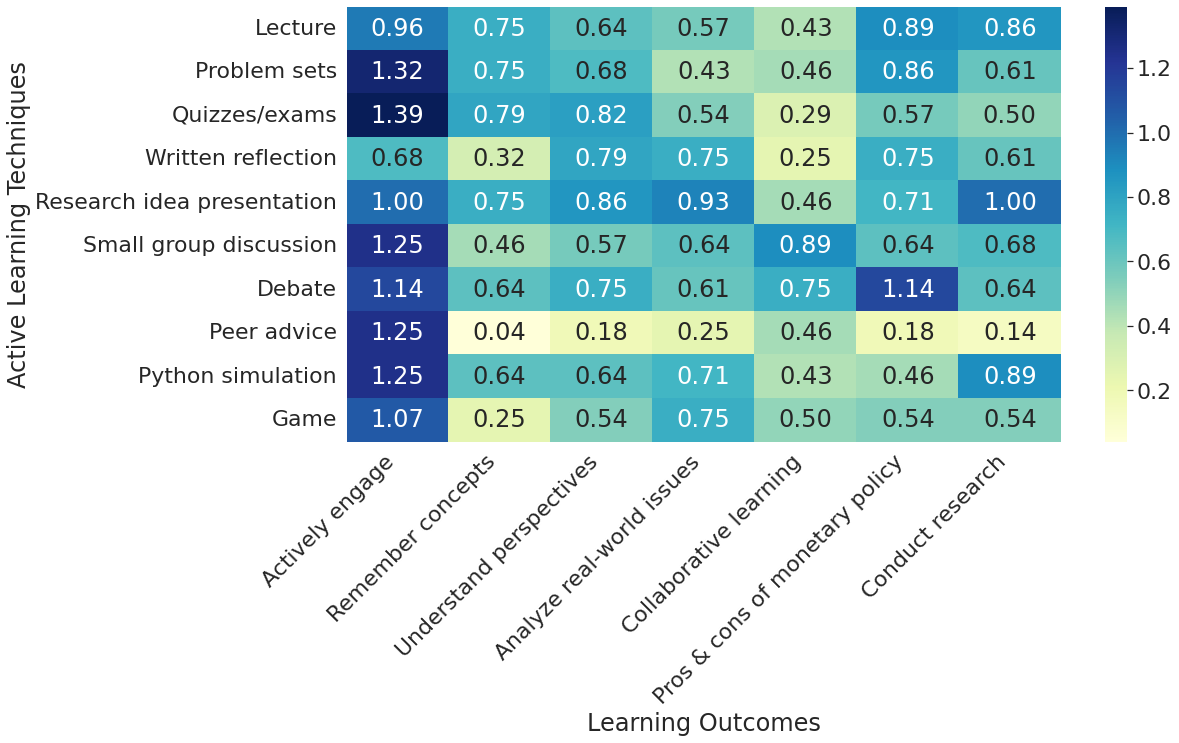

In [50]:
'''
Plot the summary data (means of effective learning perceptions) for Questions 1-7 in heatmap
'''

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.set(font_scale=2)
heatmap=sns.heatmap(df_summary,annot=True, cmap='YlGnBu',fmt='.2f')
heatmap.set_xlabel('Learning Outcomes')
heatmap.set_ylabel('Active Learning Techniques')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

In [51]:
'''
Generate a new dataframe to store standard deviations for each learning technique toward each learning objective from the raw dataframe
'''

col= ['a','b','c','d','e','f','g','h','i','j']
df_std= pd.DataFrame(np.random.random(size=(7,10)), columns=col)
df_std.index=[1,2,3,4,5,6,7]

In [52]:
'''
Insert the standard deviations of perceived engagement/effectiveness to the new dataframe accordingly
'''

for qNumber in [1,2,3,4,5,6,7]:
  for actNumber in ['a','b','c','d','e','f','g','h','i','j']:
    item = str(qNumber)+actNumber
    df_std[actNumber][qNumber] = df_dummy[item].std()
df_std = df_std.round(2)
df_std

,a,b,c,d,e,f,g,h,i,j
1,1.44,1.59,1.28,1.73,1.46,1.35,1.69,1.62,1.72,1.62
2,1.83,1.78,1.73,2.01,1.97,1.78,1.89,1.89,1.94,1.99
3,1.73,1.82,1.78,2.00,1.92,1.70,1.89,1.81,1.94,2.01
4,1.80,1.96,1.86,1.92,1.91,1.83,1.88,1.91,2.03,1.97
5,1.97,1.93,1.88,2.19,1.92,1.85,1.85,1.92,1.90,1.91
6,1.93,1.99,1.85,2.10,1.99,1.94,2.13,2.03,2.06,1.98
7,1.96,2.05,1.98,2.09,1.98,1.87,1.99,2.01,1.84,2.00


In [53]:
'''
Adjust the order of activities
'''

df_std = df_std[['f','i','h','a','c','j','e','d','g','b']]

In [54]:
'''
Replace the row numbers with learning objectives' names, 
replace the column letters with learning technique' names, 
and transform the rows and columns
'''

df_std.columns=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice',
      'Python simulation','Game']
df_std.index=['actively engage','remember concepts','understand perspectives','analyze real-world issue',
     'collaborative learning','conduct research','pros & cons about monetary policy']
df_std = df_std.T

In [55]:
df_std

,actively engage,remember concepts,understand perspectives,analyze real-world issue,collaborative learning,conduct research,pros & cons about monetary policy
Lecture,1.35,1.78,1.70,1.83,1.85,1.94,1.87
Problem sets,1.72,1.94,1.94,2.03,1.90,2.06,1.84
Quizzes/exams,1.62,1.89,1.81,1.91,1.92,2.03,2.01
Written reflection,1.44,1.83,1.73,1.80,1.97,1.93,1.96
Research idea presentation,1.28,1.73,1.78,1.86,1.88,1.85,1.98
Small group discussion,1.62,1.99,2.01,1.97,1.91,1.98,2.00
Debate,1.46,1.97,1.92,1.91,1.92,1.99,1.98
Peer advice,1.73,2.01,2.00,1.92,2.19,2.10,2.09
Python simulation,1.69,1.89,1.89,1.88,1.85,2.13,1.99
Game,1.59,1.78,1.82,1.96,1.93,1.99,2.05


Text(200.49999999999997, 0.5, 'Active Learning Techniques')

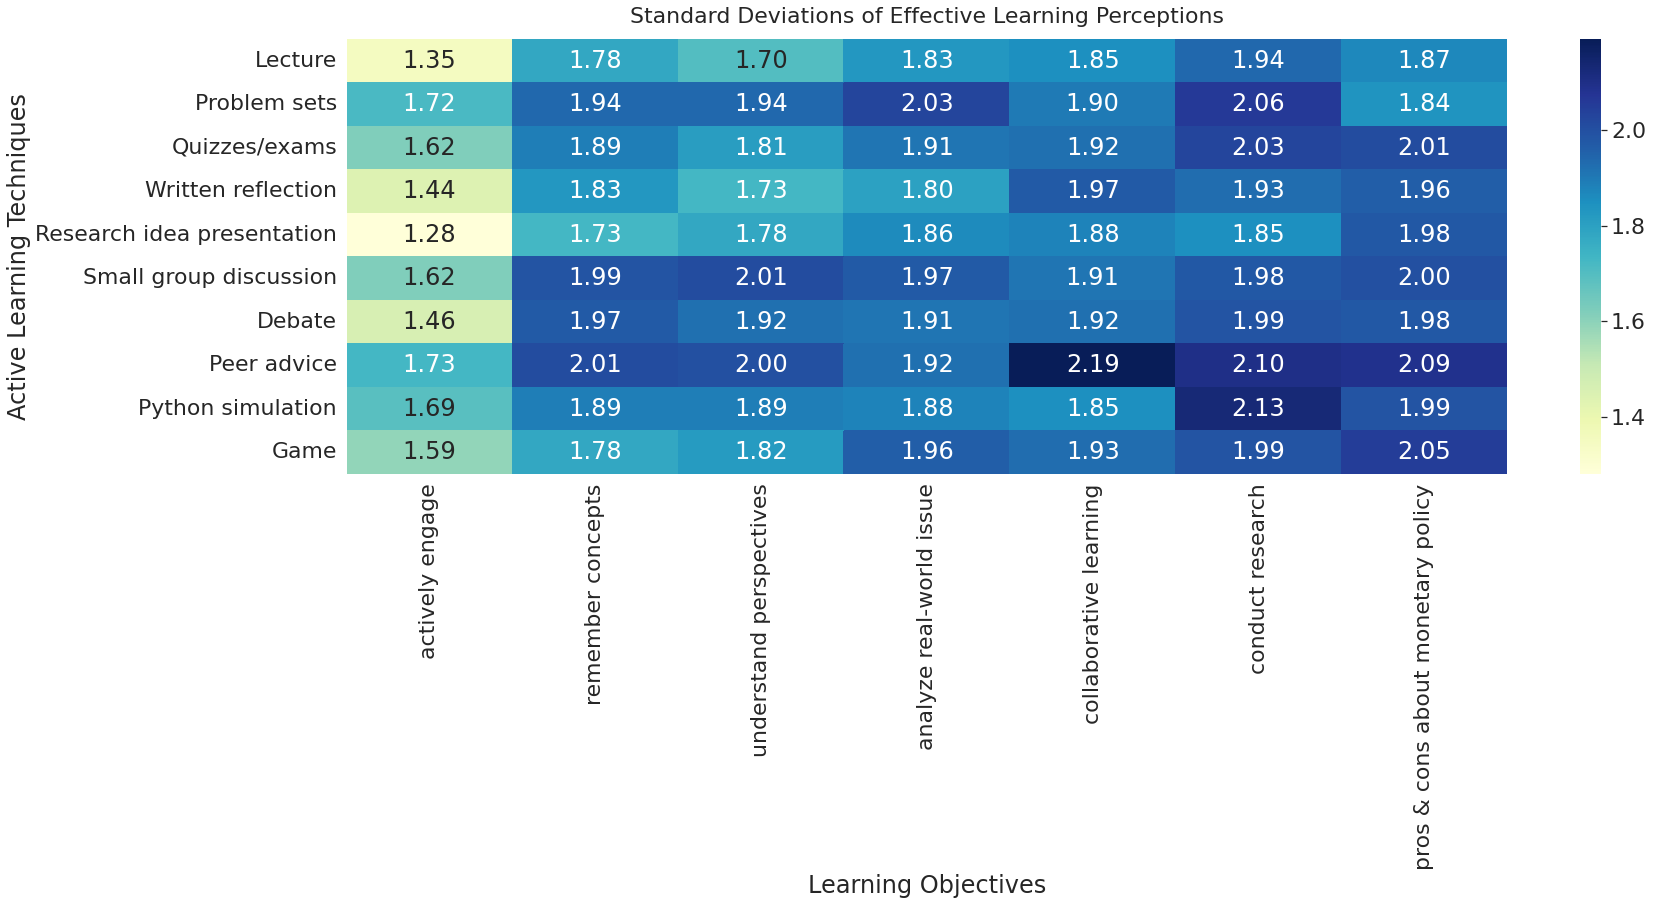

In [56]:
'''
Plot the summary data (standard deviations of effective learning perceptions) for Questions 1-7 in heatmap
'''

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(26, 8))
heatmap=sns.heatmap(df_std,annot=True, cmap='YlGnBu',fmt='.2f')
heatmap.set_title('Standard Deviations of Effective Learning Perceptions', fontdict={'fontsize':22}, pad=16)
heatmap.set_xlabel('Learning Objectives')
heatmap.set_ylabel('Active Learning Techniques')

In [57]:
'''
Generate a new dataframe to store summary data (both means and standard deviations) from the raw data
'''

col= ['actively engage','remember concepts','understand perspectives','analyze real-world issue',
     'collaborative learning','conduct research','pros & cons about monetary policy']
df0= pd.DataFrame(np.random.random(size=(10,7)), columns=col)
df0.index=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice',
      'Python simulation','Game']
df0

,actively engage,remember concepts,understand perspectives,analyze real-world issue,collaborative learning,conduct research,pros & cons about monetary policy
Lecture,0.233059,0.782640,0.617681,0.986360,0.797981,0.017930,0.341237
Problem sets,0.857224,0.688600,0.121989,0.001769,0.639366,0.641812,0.285179
Quizzes/exams,0.348141,0.738961,0.870307,0.316173,0.190607,0.221501,0.887197
Written reflection,0.297818,0.573368,0.842062,0.618063,0.319000,0.483218,0.974599
Research idea presentation,0.685269,0.187533,0.768125,0.829428,0.600506,0.703198,0.219100
Small group discussion,0.879774,0.210467,0.605005,0.657600,0.548136,0.177551,0.693533
Debate,0.371776,0.720350,0.195534,0.887595,0.521181,0.442696,0.715639
Peer advice,0.607177,0.987919,0.794094,0.676512,0.195831,0.921042,0.981851
Python simulation,0.137617,0.904486,0.544626,0.284445,0.372513,0.767004,0.674705
Game,0.493593,0.216180,0.588857,0.661317,0.313198,0.345064,0.754173


In [58]:
from IPython.display import display, HTML
def display_df(df):
  return display(HTML(df.to_html().replace('\\n','<br>')))

In [59]:
'''
Show means and standard deviations together, with standard deviations in the parentheses
'''

for qNumber in ['actively engage','remember concepts','understand perspectives','analyze real-world issue',
     'collaborative learning','conduct research','pros & cons about monetary policy']:
  for actNumber in ['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice',
      'Python simulation','Game']:
    df0[qNumber][actNumber] = '{}\n({})'.format(df_summary[qNumber][actNumber],df_std[qNumber][actNumber])
df0=display_df(df0)
df0

KeyError: ignored

#2. Spearman Correlation (Engagement, Enjoyment, and to what extent they can explain for answers to Q2-Q7)

In [60]:
df8 =  pd.read_csv('https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL8.csv')
df8.head()

,Subject Number,a. Reflection on the concept - Rank,b. Game for individual decisions - Rank,c. Presentation - Rank,d. Peer evaluations - Rank,e. Debate for Pro & Con - Rank,f. Lecture - Rank,g. Simulate economic cases using python - Rank,h. Doing quizzes/exams - Rank,i. Solving problem sets/homework - Rank,j. Group discussion during class - Rank
0,1,7,2,4,10,9,6,1,5,3,8
1,2,9,2,3,10,8,4,6,5,7,1
2,3,3,1,4,9,6,7,2,5,10,8
3,4,7,5,6,10,3,2,4,9,8,1
4,5,4,3,2,10,9,8,5,6,7,1


In [61]:
'''
Replace the original names of leaning techniques with alphabetical letters to facilitate analysis
'''

df8=df8.rename(columns={"a. Reflection on the concept - Rank": "a", "b. Game for individual decisions - Rank": "b","c. Presentation - Rank": "c",'d. Peer evaluations - Rank':'d','e. Debate for Pro & Con - Rank':'e','f. Lecture - Rank':'f','g. Simulate economic cases using python - Rank':'g','h. Doing quizzes/exams - Rank':'h','i. Solving problem sets/homework - Rank':'i','j. Group discussion during class - Rank':'j'})
df8.head()

,Subject Number,a,b,c,d,e,f,g,h,i,j
0,1,7,2,4,10,9,6,1,5,3,8
1,2,9,2,3,10,8,4,6,5,7,1
2,3,3,1,4,9,6,7,2,5,10,8
3,4,7,5,6,10,3,2,4,9,8,1
4,5,4,3,2,10,9,8,5,6,7,1


In [62]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

for i in ['a','b','c','d','e','f','g','h','i','j']:
  for j in range(28):
    df8[i][j]=11-df8[i][j]
df8.head()

,Subject Number,a,b,c,d,e,f,g,h,i,j
0,1,4,9,7,1,2,5,10,6,8,3
1,2,2,9,8,1,3,7,5,6,4,10
2,3,8,10,7,2,5,4,9,6,1,3
3,4,4,6,5,1,8,9,7,2,3,10
4,5,7,8,9,1,2,3,6,5,4,10


In [63]:
'''
Spearman correlations between engagement and enjoyment
'''

Activities = ['a','b','c','d','e','f','g','h','i','j']
for j in Activities:
    print(pg.corr(df_dummy['1'+j], df8[j], method="spearman").round(5),j)

           n        r         CI95%    p-val    power
spearman  28  0.28224  [-0.1, 0.59]  0.14563  0.31307 a
           n        r          CI95%    p-val    power
spearman  28  0.20285  [-0.18, 0.54]  0.30056  0.18077 b
           n        r         CI95%    p-val    power
spearman  28  0.38688  [0.02, 0.66]  0.04197  0.54454 c
           n       r          CI95%    p-val    power
spearman  28  0.3559  [-0.02, 0.64]  0.06306  0.47185 d
           n        r         CI95%    p-val    power
spearman  28  0.15584  [-0.23, 0.5]  0.42843  0.12493 e
           n        r          CI95%    p-val    power
spearman  28  0.02202  [-0.35, 0.39]  0.91142  0.05089 f
           n        r          CI95%    p-val    power
spearman  28  0.11382  [-0.27, 0.47]  0.56413  0.08884 g
           n        r          CI95%    p-val    power
spearman  28 -0.16343  [-0.51, 0.22]  0.40598  0.13282 h
           n        r          CI95%    p-val    power
spearman  28  0.11766  [-0.27, 0.47]  0.55099  0.09162 i


In [64]:
'''
Spearman correlations between enjoyment and effectiveness in various learning objectives
'''

#To what extent can enjoyment explain answers to Q2-Q7
Activities = ['a','b','c','d','e','f','g','h','i','j']
for i in [2,3,4,5,6,7]:
  for j in Activities:
      print(pg.corr(df_dummy[str(i)+j], df8[j], method="spearman").round(5),str(i),j)

           n        r          CI95%    p-val   power
spearman  28  0.01079  [-0.36, 0.38]  0.95655  0.0498 2 a
           n        r          CI95%    p-val    power
spearman  28  0.14274  [-0.24, 0.49]  0.46871  0.11232 2 b
           n        r          CI95%    p-val    power
spearman  28  0.12131  [-0.26, 0.47]  0.53859  0.09436 2 c
           n        r         CI95%    p-val    power
spearman  28  0.52724  [0.19, 0.75]  0.00394  0.84512 2 d
           n        r          CI95%   p-val    power
spearman  28  0.35522  [-0.02, 0.64]  0.0636  0.47028 2 e
           n        r          CI95%   p-val    power
spearman  28  0.22606  [-0.16, 0.55]  0.2474  0.21458 2 f
           n        r          CI95%    p-val    power
spearman  28  0.09323  [-0.29, 0.45]  0.63703  0.07563 2 g
           n        r          CI95%    p-val   power
spearman  28 -0.32781  [-0.62, 0.05]  0.08858  0.4082 2 h
           n       r          CI95%    p-val    power
spearman  28  0.1963  [-0.19, 0.53]  0.31675

In [65]:
'''
Spearman correlations between engagement and effectiveness in various learning objectives
'''

#To what extent can engagement explain answers to Q2-Q7
Activities = ['a','b','c','d','e','f','g','h','i','j']
for i in [2,3,4,5,6,7]:
  for j in Activities:
      print(pg.corr(df[str(i)+j], df[str(1)+j], method="spearman").round(5),str(i),j)

KeyError: ignored

#3. Hypothesis Testing (Compare the Effectiveness of different techniques toward various learning objectives, Q2-Q7)

In [66]:
'''
Hypothesis Testing: Which learning technique is more effective in a pair for each learning objective?
'''

Activities = ['a','b','c','d','e','f','g','h','i','j']
for i in [1,2,3,4,5,6,7]:
  for j in Activities:
    for k in Activities:
      if k != j:
        print(pg.wilcoxon(df[str(i)+j], df[str(i)+k], alternative='less').round(5),str(i),j,k)
      else:
        print()

KeyError: ignored

#4. Hypothesis Testing (Compare enjoyment among different learning techniques, Q8; Compare effectiveness in building SW project, Q9)

##Q8: Enjoyment

In [67]:
df8 = df8[['Subject Number','f','i','h','a','c','j','e','d','g','b']]
df8=df8.rename(columns={'f':'Lecture','i':'Problem sets','h':'Quizzes/exams','a':'Written reflection','c':'Research idea presentation','j':'Small group discussion','e':'Debate','d':'Peer advice','g':'Python simulation','b':'Game'})
df8.head()

,Subject Number,Lecture,Problem sets,Quizzes/exams,Written reflection,Research idea presentation,Small group discussion,Debate,Peer advice,Python simulation,Game
0,1,5,8,6,4,7,3,2,1,10,9
1,2,7,4,6,2,8,10,3,1,5,9
2,3,4,1,6,8,7,3,5,2,9,10
3,4,9,3,2,4,5,10,8,1,7,6
4,5,3,4,5,7,9,10,2,1,6,8


In [68]:
'''
Hypothesis Testing: Which learning technique is perceived to be more enjoyable in a pair?
'''

#Compare enjoyment among different learning techniques, Q8
Activities = ['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game']
for i in Activities:
  for j in Activities:
      print(pg.mwu(df8[i], df8[j], alternative='less').round(5),i,j)

     U-val alternative    p-val  RBC  CLES
MWU  392.0        less  0.50331  0.0   0.5 Lecture Lecture
     U-val alternative    p-val      RBC     CLES
MWU  424.0        less  0.70442 -0.08163  0.45918 Lecture Problem sets
     U-val alternative    p-val      RBC     CLES
MWU  495.5        less  0.95679 -0.26403  0.36798 Lecture Quizzes/exams
     U-val alternative    p-val      RBC     CLES
MWU  424.5        less  0.70695 -0.08291  0.45855 Lecture Written reflection
     U-val alternative   p-val      RBC     CLES
MWU  401.5        less  0.5655 -0.02423  0.48788 Lecture Research idea presentation
     U-val alternative    p-val      RBC     CLES
MWU  342.0        less  0.20638  0.12755  0.56378 Lecture Small group discussion
     U-val alternative    p-val      RBC     CLES
MWU  408.5        less  0.61046 -0.04209  0.47895 Lecture Debate
     U-val alternative    p-val      RBC     CLES
MWU  595.5        less  0.99963 -0.51913  0.24043 Lecture Peer advice
     U-val alternative   p-va

In [69]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

df88=pd.melt(df8, id_vars=['Subject Number'], value_vars=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game'])
df88.drop('Subject Number',inplace=True, axis=1)
df88['Enjoyment']=df88['value']
df88['activities']=df88['variable']
df88

,variable,value,Enjoyment,activities
0,Lecture,5,5,Lecture
1,Lecture,7,7,Lecture
2,Lecture,4,4,Lecture
3,Lecture,9,9,Lecture
4,Lecture,3,3,Lecture
...,...,...,...,...
275,Game,8,8,Game
276,Game,6,6,Game
277,Game,3,3,Game
278,Game,10,10,Game


In [70]:
'''
boxplot for 10 learning techniques' enjoyment
'''

import plotly.express as px
fig = px.box(df88, x="activities", y="Enjoyment")
fig.show()

##Q9: Effectivness in Signature Work (SW)

In [71]:
df9 =  pd.read_csv("https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL9.csv")
df9.head()

,Subject Number,a. Reflection on the concept - Rank,b. Game for individual decisions - Rank,c. Presentation - Rank,d. Peer evaluations - Rank,e. Debate for Pro & Con - Rank,f. Lecture - Rank,g. Simulate economic cases using python - Rank,h. Doing quizzes/exams - Rank,i. Solving problem sets/homework - Rank,j. Group discussion during class - Rank
0,1,3,10,1,4,9,8,2,7,5,6
1,2,4,9,2,10,8,1,5,7,6,3
2,3,8,1,6,4,10,7,5,9,3,2
3,4,6,7,2,10,3,4,1,9,8,5
4,5,2,3,4,9,8,5,6,7,10,1


In [72]:
'''
Shorten learning techniques' names
'''

df9=df9.rename(columns={"a. Reflection on the concept - Rank": "Written reflection", "b. Game for individual decisions - Rank": "Game","c. Presentation - Rank": "Research idea presentation",'d. Peer evaluations - Rank':'Peer advice','e. Debate for Pro & Con - Rank':'Debate','f. Lecture - Rank':'Lecture','g. Simulate economic cases using python - Rank':'Python simulation','h. Doing quizzes/exams - Rank':'Quizzes/exams','i. Solving problem sets/homework - Rank':'Problem sets','j. Group discussion during class - Rank':'Small group discussion'})
df9.head()

,Subject Number,Written reflection,Game,Research idea presentation,Peer advice,Debate,Lecture,Python simulation,Quizzes/exams,Problem sets,Small group discussion
0,1,3,10,1,4,9,8,2,7,5,6
1,2,4,9,2,10,8,1,5,7,6,3
2,3,8,1,6,4,10,7,5,9,3,2
3,4,6,7,2,10,3,4,1,9,8,5
4,5,2,3,4,9,8,5,6,7,10,1


In [73]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

for i in ['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game']:
  for j in range(28):
    df9[i][j]=10-df9[i][j]
df9.head()

,Subject Number,Written reflection,Game,Research idea presentation,Peer advice,Debate,Lecture,Python simulation,Quizzes/exams,Problem sets,Small group discussion
0,1,7,0,9,6,1,2,8,3,5,4
1,2,6,1,8,0,2,9,5,3,4,7
2,3,2,9,4,6,0,3,5,1,7,8
3,4,4,3,8,0,7,6,9,1,2,5
4,5,8,7,6,1,2,5,4,3,0,9


In [74]:
'''
Hypothesis Testing: Which learning technique is perceived to be more effective signature work projects in a pair?
'''

#Compare effectiveness in developing Signature Work Project
Activities = ['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game']
for i in Activities:
  for j in Activities:
      print(pg.mwu(df9[i], df9[j], alternative='less').round(5),i,j)

     U-val alternative   p-val  RBC  CLES
MWU  392.0        less  0.5033  0.0   0.5 Lecture Lecture
     U-val alternative    p-val      RBC     CLES
MWU  359.5        less  0.29885  0.08291  0.54145 Lecture Problem sets
     U-val alternative    p-val     RBC    CLES
MWU  561.5        less  0.99754 -0.4324  0.2838 Lecture Quizzes/exams
     U-val alternative    p-val      RBC     CLES
MWU  317.5        less  0.11098  0.19005  0.59503 Lecture Written reflection
     U-val alternative    p-val      RBC     CLES
MWU  280.0        less  0.03285  0.28571  0.64286 Lecture Research idea presentation
     U-val alternative    p-val      RBC    CLES
MWU  351.0        less  0.25221  0.10459  0.5523 Lecture Small group discussion
     U-val alternative    p-val      RBC     CLES
MWU  383.5        less  0.44741  0.02168  0.51084 Lecture Debate
     U-val alternative    p-val      RBC     CLES
MWU  529.0        less  0.98849 -0.34949  0.32526 Lecture Peer advice
     U-val alternative    p-val    

In [75]:
'''
Reverse the rank (replace ranking number with (10 - ranking number)) to facilitate analysis
'''

df99=pd.melt(df9, id_vars=['Subject Number'], value_vars=['Lecture','Problem sets','Quizzes/exams','Written reflection','Research idea presentation','Small group discussion','Debate','Peer advice','Python simulation','Game'])
df99.drop('Subject Number',inplace=True, axis=1)
df99['Effectiveness']=10-df99['value']
df99['activities']=df99['variable']
df99

,variable,value,Effectiveness,activities
0,Lecture,2,8,Lecture
1,Lecture,9,1,Lecture
2,Lecture,3,7,Lecture
3,Lecture,6,4,Lecture
4,Lecture,5,5,Lecture
...,...,...,...,...
275,Game,7,3,Game
276,Game,1,9,Game
277,Game,3,7,Game
278,Game,2,8,Game


In [76]:
'''
Boxplot for reported effectiveness in SW project among different learning techniques
'''

import plotly.express as px
fig = px.box(df99, x="activities", y="Effectiveness")
fig.show()

#5. Word Cloud

In [77]:
df10 =  pd.read_csv("https://raw.githubusercontent.com/SciEcon/Active_Learning/main/data/EL9.csv")
df10.head()

,Subject Number,a. Reflection on the concept - Rank,b. Game for individual decisions - Rank,c. Presentation - Rank,d. Peer evaluations - Rank,e. Debate for Pro & Con - Rank,f. Lecture - Rank,g. Simulate economic cases using python - Rank,h. Doing quizzes/exams - Rank,i. Solving problem sets/homework - Rank,j. Group discussion during class - Rank
0,1,3,10,1,4,9,8,2,7,5,6
1,2,4,9,2,10,8,1,5,7,6,3
2,3,8,1,6,4,10,7,5,9,3,2
3,4,6,7,2,10,3,4,1,9,8,5
4,5,2,3,4,9,8,5,6,7,10,1


In [81]:
'''
Print answers to Question 10
'''

response = ' '
for i in range(28):
  answer = df10['Q10. Following Q9, can you give an example of how these learning activities have helped you?'][i]
  response = response+' '+answer
  print('No. '+str(i+1)+' Student: '+answer)                                                                                  

KeyError: ignored

reference: simple word cloud https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

In [79]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [80]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 1600, height = 700, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(response)
# Plot
plot_cloud(wordcloud)

ValueError: ignored

In [82]:
# Generate wordcloud
wordcloud = WordCloud(width = 1600, height = 700, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(response)
# Plot
plot_cloud(wordcloud)

ValueError: ignored

In [83]:
# Save image
wordcloud.to_file("wordcloud.png")

NameError: ignored